# Advance Lane Finding Project
## First part: Preprocessing images


Initially when you get a camera, this will output images with certain distorsions and curvatures at the edges due to the lenses. In order to fix this natural behaviour you first have to calibrate the camera. One of the most commonly used techniques to calibrate a camera is by taking pictures of a chessboard so that you can output the distortion coefficients. Once you have the coefficients done, you can undistort any image/frame that you take with the camera.

## imgpoints & objpoints creation

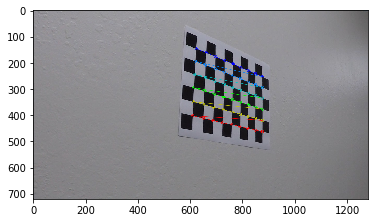

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#Read in the calibration image
images = glob.glob('camera_cal/calibration*.jpg')

#Prepare object points in the shape of (0,0,0), (1,0,0), (2,0,0)...,(8,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = []
imgpoints = []

for image in images:
    img = mpimg.imread(image)
    #Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    #Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    #If corners are found add object points and image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        plt.imshow(img)
        #cv2.waitKey(50)


## Preprocessing functions

In [2]:
def mtx_dist(objpoints=objpoints, imgpoints=imgpoints):
    img_size = (1280, 720)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    return mtx, dist

mtx, dist = mtx_dist()

In [3]:
def undistort(img, mtx=mtx,dist=dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

def transform(img):
    img = np.copy(img)
    img_size = (img.shape[1], img.shape[0])
    
    src = np.float32([[570,460],[720, 460],[1130,720], [200,720]]) #470
    dst = np.float32([[320, 0], [980, 0], [980, 720],[320, 720]])
       
    M = cv2.getPerspectiveTransform(src, dst)
    
    warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    
    return warped

def transform_inv(img):
    img = np.copy(img)
    img_size = (img.shape[1], img.shape[0])

    src = np.float32([[570,460],[720, 460],[1130,720], [200,720]])
    dst = np.float32([[320, 0], [980, 0], [980, 720],[320, 720]])
    
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, Minv, img_size, flags=cv2.INTER_LINEAR)
    
    return warped
    


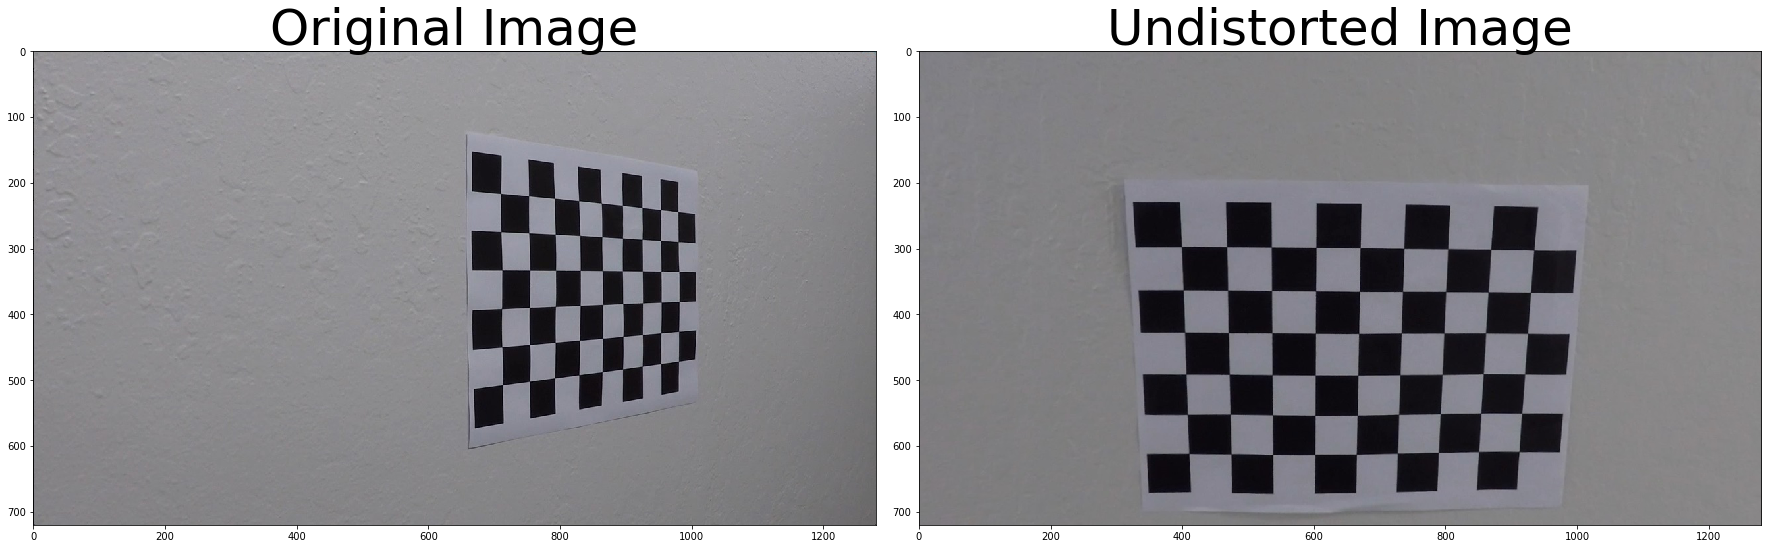

In [4]:
#Try undistortion with the chess images
imagesU = []
imge = []
for i in range(0, 19):
    img = mpimg.imread(images[i])
    imge.append(img)
    undistorted = undistort(img)
    imagesU.append(undistorted)

#chess_images contains the undistortioned calibration images
#You didnt need to do it to all chessboards, but well...
chess_images = np.array(imagesU)

# Plot the 2 images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(imge[18])
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(imagesU[8], cmap='gray')
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Show Image

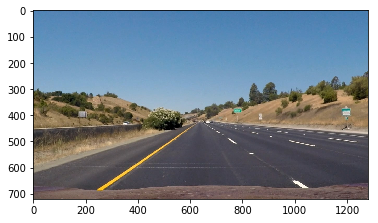

## Undistort Image

Text(0.5,1,'Undistorted Image')

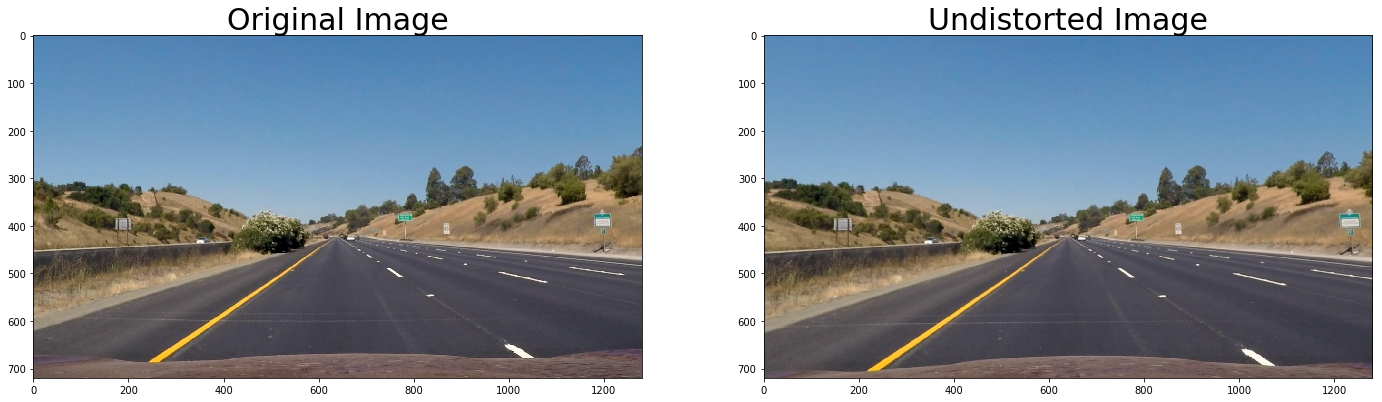

In [6]:
undis_image = undistort(image)

# Visualize original image vs undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(undis_image)
ax2.set_title('Undistorted Image', fontsize=30)

## Transform Image

Text(0.5,1,'Transformed Image')

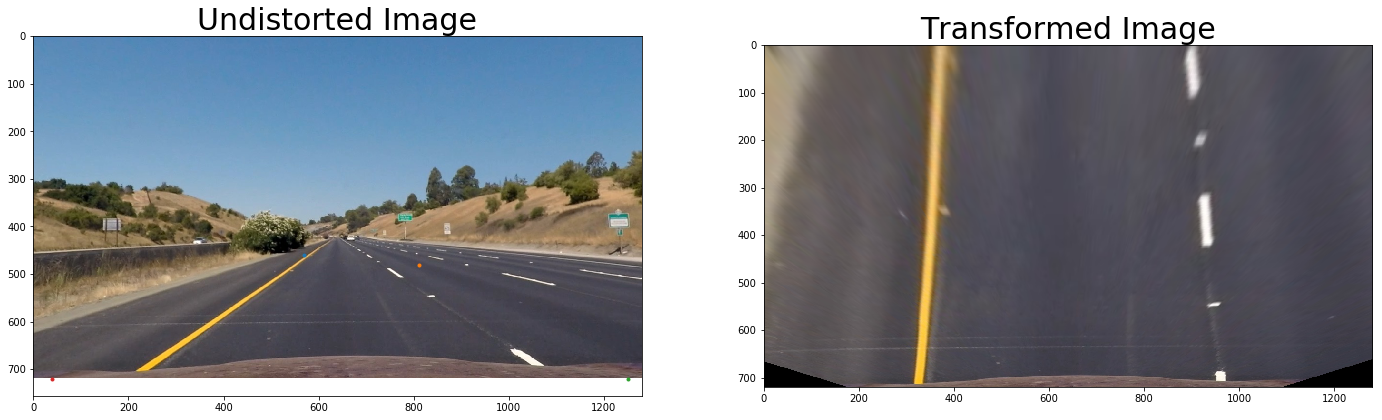

In [7]:
transf_image = transform(undis_image)
#undis_image = transf_image
# Visualize original image vs undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,9))
ax1.imshow(undis_image)

ax1.plot(570,460, '.')
ax1.plot(810, 482, '.')
ax1.plot(1250, 720, '.')
ax1.plot(40, 720, '.')

ax1.set_title('Undistorted Image', fontsize=30)
ax2.imshow(transf_image)
ax2.set_title('Transformed Image', fontsize=30)

## Visualization of different colorspaces

Text(0.5,1,'__b Colorspace')

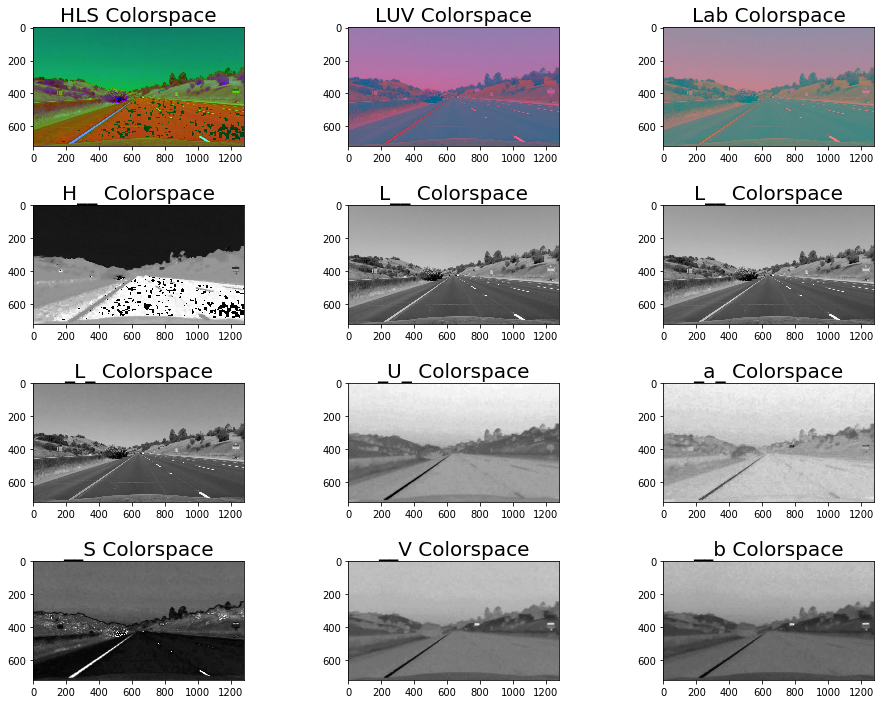

In [8]:
#undis_image = cv2.imread('test_images/test5.jpg')

HLS = cv2.cvtColor(undis_image, cv2.COLOR_BGR2HLS)
H_HLS = cv2.cvtColor(undis_image, cv2.COLOR_BGR2HLS)[:,:,0]
L_HLS = cv2.cvtColor(undis_image, cv2.COLOR_BGR2HLS)[:,:,1]
S_HLS = cv2.cvtColor(undis_image, cv2.COLOR_BGR2HLS)[:,:,2]

LUV = cv2.cvtColor(undis_image, cv2.COLOR_BGR2LUV)#[:,:,0]
L_LUV = cv2.cvtColor(undis_image, cv2.COLOR_BGR2LUV)[:,:,0]
U_LUV = cv2.cvtColor(undis_image, cv2.COLOR_BGR2LUV)[:,:,1]
V_LUV = cv2.cvtColor(undis_image, cv2.COLOR_BGR2LUV)[:,:,2]

Lab = cv2.cvtColor(undis_image, cv2.COLOR_BGR2Lab)#[:,:,2] 
L_Lab = cv2.cvtColor(undis_image, cv2.COLOR_BGR2Lab)[:,:,0]
a_Lab = cv2.cvtColor(undis_image, cv2.COLOR_BGR2Lab)[:,:,1]
b_Lab = cv2.cvtColor(undis_image, cv2.COLOR_BGR2Lab)[:,:,2]

fig, axs = plt.subplots(4,3, figsize=(16, 12))
fig.subplots_adjust(hspace = 0.5)
axs = axs.ravel()
axs[0].imshow(HLS, cmap = 'gray')
axs[0].set_title('HLS Colorspace', fontsize=20)
axs[3].imshow(H_HLS, cmap = 'gray')
axs[3].set_title('H__ Colorspace', fontsize=20)
axs[6].imshow(L_HLS, cmap = 'gray')
axs[6].set_title('_L_ Colorspace', fontsize=20)
axs[9].imshow(S_HLS, cmap = 'gray')
axs[9].set_title('__S Colorspace', fontsize=20)
#######
axs[1].imshow(LUV, cmap = 'gray')
axs[1].set_title('LUV Colorspace', fontsize=20)
axs[4].imshow(L_LUV, cmap = 'gray')
axs[4].set_title('L__ Colorspace', fontsize=20)
axs[7].imshow(U_LUV, cmap = 'gray')
axs[7].set_title('_U_ Colorspace', fontsize=20)
axs[10].imshow(V_LUV, cmap = 'gray')
axs[10].set_title('__V Colorspace', fontsize=20)
########
axs[2].imshow(Lab, cmap = 'gray')
axs[2].set_title('Lab Colorspace', fontsize=20)
axs[5].imshow(L_Lab,cmap = 'gray')
axs[5].set_title('L__ Colorspace', fontsize=20)
axs[8].imshow(a_Lab, cmap = 'gray')
axs[8].set_title('_a_ Colorspace', fontsize=20)
axs[11].imshow(b_Lab,cmap = 'gray')
axs[11].set_title('__b Colorspace', fontsize=20)

    
# plt.imshow(HLS)
# plt.imshow(LUV)
# plt.imshow(Lab)

## Sobel Threshold

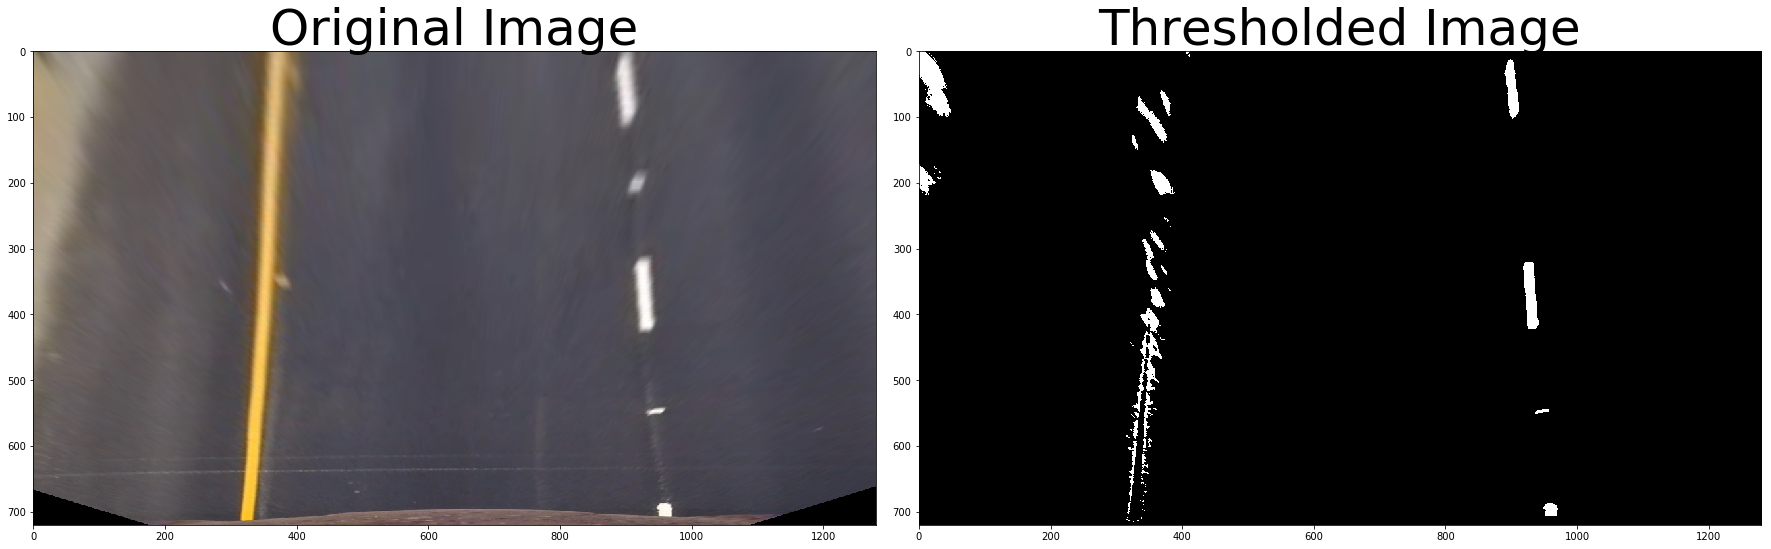

In [9]:
def sobel_and_colorspaced(img):

    def sobelx(gray, orient='x', thresh_min=0, thresh_max=255):
        if orient == 'x':
            sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
        else:
            sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
            
        abs_sobel = np.absolute(sobel)
        
        max_value = np.max(abs_sobel)
        
        binary_output = np.uint8(255*abs_sobel/max_value)
        
        threshold_mask = np.zeros_like(binary_output)
        threshold_mask[(binary_output >= thresh_min) & (binary_output <= thresh_max)] = 1
        
        return threshold_mask

    def dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/2)):
        
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
      
        abs_sobel_x = np.absolute(sobel_x)
        abs_sobel_y = np.absolute(sobel_y)
        
        #Calculate the direction of the gradient
        direction = np.arctan2(abs_sobel_y,abs_sobel_x)
        direction = np.absolute(direction)
       
        mask = np.zeros_like(direction)
        mask[(direction >= thresh[0]) & (direction <= thresh[1])] = 1
        
        return mask    
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)[:,:,2]
    
    height, width = gray.shape

    #Apply gradient threshold on the horizontal gradient
    x_binary = sobelx(gray, 'x', 10, 200)

    #Apply gradient direction threshold so that only edges closer to vertical are detected.
    dir_binary = dir_threshold(gray, thresh=(np.pi/6, np.pi/2))
 
    
    # color channel thresholds
    HLS = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S_HLS = HLS[:,:,2]
    L_HLS = HLS[:,:,1]      
    R_RGB = img[:,:,0]
    G_RGB = img[:,:,1]
        
    S_thresh = (100, 255)   
    L_thresh = (120, 255)
    RG_threshold = 150
    
    
    
    def select_yellow(image):
        hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        lower = np.array([20,60,60])
        upper = np.array([38,174, 250])
        mask = cv2.inRange(hsv, lower, upper)
        return mask

    def select_white(image):
        lower = np.array([202,202,202])
        upper = np.array([255,255,255])
        mask = cv2.inRange(image, lower, upper)
        return mask

    def comb_thresh(image):
        yellow = select_yellow(image)
        white = select_white(image)
        combined_color_binary = np.zeros_like(yellow)
        combined_color_binary[(yellow >= 1) | (white >= 1)] = 1

        return combined_color_binary

    color_combined = np.zeros_like(R_RGB)
    color_combined[comb_thresh(img)==1 | (L_HLS > L_thresh[0]) & (L_HLS <= L_thresh[1]) & ((S_HLS > S_thresh[0]) & (S_HLS <= S_thresh[1]) | ((x_binary == 1) & (dir_binary == 1)))] = 1

    #
    
    #Combine all the requirements that pixels need to meet (white/yellow)
    #color_combined = np.zeros_like(R_RGB)
    #color_combined[(R_RGB > RG_threshold) & (G_RGB > RG_threshold) & (L_HLS > L_thresh[0]) & (L_HLS <= L_thresh[1]) & ((S_HLS > S_thresh[0]) & (S_HLS <= S_thresh[1]) | ((x_binary == 1) & (dir_binary == 1)))] = 1
    #combined_color_binary = comb_thresh(img)
    return color_combined

thresholded = sobel_and_colorspaced(transf_image)

# Plot the 2 images side by side
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(transf_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(thresholded, cmap='gray')
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



## Generate polyfit through windows

Histogram

left


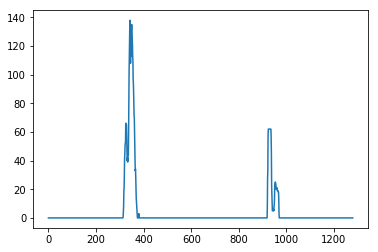

In [10]:
def histogram(img, show=False):
    #Image to be used for calculating the right equations:
    #img = thresholded
    #Generate histogram to show pics of white pixels
    histogram = np.sum(img[img.shape[0]//2:,:], axis=0)
    #Divide the histogram for left and right lane
    midpoint = np.int(histogram.shape[0]//2)
    #Store the max value of the histogram from beginning to midpoint
    leftx_base = np.argmax(histogram[:midpoint])
    #Store the max value of the histogram from midpoint to end
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    
    if show == True:
        plt.plot(histogram)
        
    max_id = np.argmax(histogram)
    max_val = histogram[max_id]

    if max_id == leftx_base:
        reliable_side = 'left'
    elif max_id == rightx_base:
        reliable_side = 'right'
        
    return reliable_side, leftx_base, rightx_base

reliable_side, leftx_base, rightx_base = histogram(thresholded, show=True)
print(reliable_side)

## Polyfit

In [11]:
def polyfit(img, leftx_base, rightx_base):
    num_windows = 10
    window_height = np.int(img.shape[0]/num_windows)
    
    #Identify the (x,y) of all the non-zero pixels in the image (White pixels)
    nonzero = img.nonzero()
    nonzerox = np.array(nonzero[1])
    nonzeroy = np.array(nonzero[0])

    leftx_current = leftx_base
    rightx_current = rightx_base

    #Set the width of the windows +/- margin
    margin = 80

    #Set minimum number of pixels found to recenter window
    minpix = 100

    #Create empty lists to receive left and right lane pixel indices + limits of rectangle for later plot
    left_lane_inds = []
    right_lane_inds = []
    rectangle_limits = []

    for window in range(num_windows):
        #Set boudaries of each window
        win_y_low = img.shape[0] - (window+1)*window_height
        win_y_high = img.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin

        rectangle_limits.append([win_xleft_low,win_xright_low,win_y_low,win_xleft_high,win_xright_high,win_y_high])
        
        #Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]

        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)

        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 
    
    #Detect and alert if no pixels are found
    if len(righty)==0 or len(lefty)==0:
        return 'Abort'
    else:
        # Fit a second order polynomial to each
        left_fit = np.polyfit(lefty, leftx, 2)
        right_fit = np.polyfit(righty, rightx, 2)
    
        return left_fit, right_fit, left_lane_inds, right_lane_inds, rectangle_limits



## Plot Polyfit

left_fit: -0.000144682022242
right_fit: 6.78883700893e-06
reliable_side: ('left', 343, 924)
left_fit: [ -1.44682022e-04   5.11494809e-02   3.56325033e+02]
right_fit: [  6.78883701e-06   8.71153221e-02   8.94983482e+02]


(720, 0)

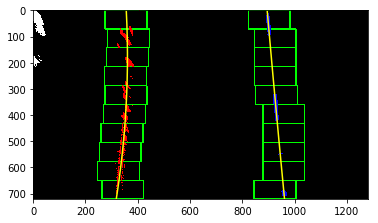

In [12]:
left_fit, right_fit, left_lane_inds, right_lane_inds, rectangle_limits = polyfit(thresholded, leftx_base, rightx_base)
reliable_side = histogram(thresholded)

print('left_fit:', left_fit[0])
print('right_fit:', right_fit[0])
print('reliable_side:', reliable_side)

weight_coeffA = 0.5 
weight_coeffB = 0.2 

if reliable_side == 'left':
    right_fit[0] = (weight_coeffA*left_fit[0]+right_fit[0])
    right_fit[1] = (weight_coeffB*left_fit[1]+right_fit[1])
    
elif reliable_side == 'right':
    left_fit[0] = (weight_coeffA*right_fit[0]+left_fit[0])
    left_fit[1] = (weight_coeffB*right_fit[1]+left_fit[1])

print('left_fit:', left_fit)
print('right_fit:', right_fit)


out_img = np.dstack((thresholded, thresholded, thresholded))*255

nonzero = thresholded.nonzero()
nonzerox = np.array(nonzero[1])
nonzeroy = np.array(nonzero[0])

#Draw the windows on the image
for limit in rectangle_limits:
    cv2.rectangle(out_img,(limit[0], limit[2]),(limit[3],limit[5]),
    (0,255,0), 4) 
    cv2.rectangle(out_img,(limit[1], limit[2]),(limit[4],limit[5]),
    (0,255,0), 4)


# Generate x and y values for plotting
ploty = np.linspace(0, thresholded.shape[0]-1, thresholded.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

## Polyfit from previous detected lines

In [13]:
# Assume you now have a new warped binary image 
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
def new_polyfit(img, left_fit, right_fit):
    nonzero = img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    margin = 40

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    # Fit a second order polynomial to each
    left_fit_new = np.polyfit(lefty, leftx, 2)
    right_fit_new = np.polyfit(righty, rightx, 2)
 
    return left_fit_new, right_fit_new, left_lane_inds, right_lane_inds, margin

#ploty, left_fitx, right_fitx = draw(warped, nonzero, left_fit, right_fit, margin = 100)

## Plot polyfit (new)

In [14]:
left_fit_new, right_fit_new, left_lane_inds, right_lane_inds, margin = new_polyfit(thresholded, left_fit, right_fit)

316.475418881


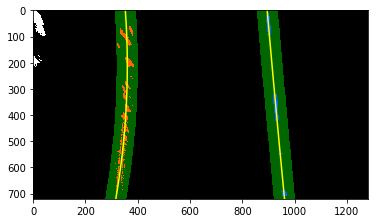

In [29]:
nonzero = thresholded.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

# Generate x and y values for plotting
ploty = np.linspace(0, thresholded.shape[0]-1, thresholded.shape[0] )
left_fitx = left_fit_new[0]*ploty**2 + left_fit_new[1]*ploty + left_fit_new[2]
right_fitx = right_fit_new[0]*ploty**2 + right_fit_new[1]*ploty + right_fit_new[2]

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((thresholded, thresholded, thresholded))*255
window_img = np.zeros_like(out_img)

# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.4, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
print(left_fitx[-1])

## Curvature Calculation

In [35]:
def calculate_curvature_and_center(warped_img, left_fit, right_fit, left_lane_inds, right_lane_inds):
    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0] )
    y_eval = np.max(ploty)
    # Define conversions in x and y from pixels space to meters
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/800 # meters per pixel in x dimension
    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = warped_img.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit new polynomials to x,y in world space
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*y_eval + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*y_eval + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    #print(left_curverad, 'm', right_curverad, 'm')
    # Example values: 632.1 m    626.2 m
    
    #Assuming the camera is mounted in the centre of the image, means:
    camera = warped_img.shape[1]/2
    #Then the center of lane will be the middle point between the ends of polynomial 
    center_of_lane = (left_fitx[-1] + right_fitx[-1])/2
    #And the value in meters is
    center_dist = ( camera - center_of_lane )*xm_per_pix
    
    return left_curverad,right_curverad, center_dist




## Draw lane on road

In [36]:
#LEFT_FIT FROM POLYFIT not new

def draw_on_lane(original_img, warped_img, left_fit, right_fit, left_curverad,right_curverad, center_dist):
    
    # Create an image to draw the lines on
    warp_zero = np.zeros_like(warped_img).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, warped_img.shape[0]-1, warped_img.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    
    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    
    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,50, 255))
       
    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = transform_inv(color_warp)
    # Combine the result with the original image
    result = cv2.addWeighted(original_img, 1, newwarp, 0.3, 0)
    
    #left_curverad, right_curverad, center_dist = calculate_curvature_and_center(thresholded, left_fit, right_fit)
    Avg_curverad = (left_curverad+right_curverad)/2
    text = 'Radius of curve: ' + '{:04.2f}'.format( Avg_curverad) + 'm'
    cv2.putText(result, text, (40,70), cv2.FONT_HERSHEY_DUPLEX, 2, (230,230,0), 2, cv2.LINE_AA)
    text = 'Car offset by: ' + '{:04.3f}'.format(center_dist) + 'm '
    cv2.putText(result, text, (40,120), cv2.FONT_HERSHEY_DUPLEX, 2, (230,230,0), 2, cv2.LINE_AA)
    
    
    
    return result
    

    


## Pipeline

In [40]:
left_fits = []
right_fits = []

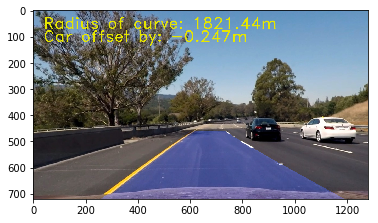

In [48]:
imageIx = 'test6'
path = 'test_images/' + imageIx +'.jpg'
image = mpimg.imread(path)

def pipeline(original_img):
    undis_image = undistort(original_img)
    transf_image = transform(undis_image)
    warped_img = sobel_and_colorspaced(transf_image)
    reliable_side, leftx_base, rightx_base = histogram(warped_img)
    
            
    if polyfit(warped_img, leftx_base, rightx_base) == 'Abort':
        left_fit_new, right_fit_new, left_lane_inds, right_lane_inds, margin = new_polyfit(warped_img, left_fits[-1], right_fits[-1])
        left_fits.append(left_fit_new)
        right_fits.append(right_fit_new)
        left_curverad, right_curverad, center_dist = calculate_curvature_and_center(warped_img, left_fit, right_fit, left_lane_inds, right_lane_inds)
        result = draw_on_lane(undis_image, warped_img, left_fits[-1], right_fits[-1], left_curverad, right_curverad, center_dist)
    else:
        left_fit, right_fit, left_lane_inds, right_lane_inds, rectangle_limits = polyfit(warped_img, leftx_base, rightx_base)
        left_fits.append(left_fit)
        right_fits.append(right_fit)
        left_curverad, right_curverad, center_dist = calculate_curvature_and_center(warped_img, left_fit, right_fit, left_lane_inds, right_lane_inds)
        result = draw_on_lane(undis_image, warped_img, left_fit, right_fit, left_curverad, right_curverad, center_dist)
        
    #print('leftx_base:',leftx_base)
    #print('right_fits:',right_fits)
          
    
        
    return result

fig, img = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
img.imshow(result)
fig.savefig('output_images/{}.jpg'.format(imageIx))   # save the figure to file
plt.close(fig)

result = pipeline(image)
plt.imshow(result)

In [39]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

#The video output will be called:
output_video = 'output_videos/project_video_output.mp4'

#Get this video as input
input_video = VideoFileClip('project_video.mp4')#.subclip(t_start='00:00:23.90')

#For each frame of the video_input do the required processing
processed_video = input_video.fl_image(pipeline)

#Save and show time processing bar
%time processed_video.write_videofile(output_video, audio=False)





[MoviePy] >>>> Building video output_videos/project_video_output.mp4
[MoviePy] Writing video output_videos/project_video_output.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [04:12<00:00,  4.78it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_video_output.mp4 

Wall time: 4min 13s
